## 1. Test and filter outliers

In [2]:
import pandas as pd
pd.set_option('chained_assignment',None)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def find_type_outliers(df): #find outlier according to the msprice range of individual Crop Type
    types=list(df["Type"].unique())
    for typ in types:
        data_temp=df[df["Type"]==typ] # Entire data of one type of crop
        actual=len(data_temp) # Total instances of each crop type
        q1 = data_temp["msprice"].quantile(0.25)
        q3 = data_temp["msprice"].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        lower_threshold  = q1-1.5*iqr
        upper_threshold = q3+1.5*iqr
        data_filter=data_temp[(data_temp["msprice"] > lower_threshold) & (data_temp["msprice"] < upper_threshold)]
        filtered=len(data_filter)
        if actual!=filtered:
            print(typ)
        else:
            print("No outlier found in ",typ)

In [4]:
def plot_commodity_outliers(df): #plot commodity price outliers in a particular type 
    commodities=list(df["commodity"].unique())
    flag=0
    for commodity in commodities:
        data_temp=df[df["commodity"]==commodity] # taking one type of commodity in one iteration
        actual=len(data_temp)
        if actual>1 :
            q1 = data_temp["msprice"].quantile(0.25)
            q3 = data_temp["msprice"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            data_filter=data_temp[(data_temp["msprice"] > lower_threshold) & (data_temp["msprice"] < upper_threshold)]
            filtered=len(data_filter)
            if actual!=filtered:
                flag=1
                plt.figure(figsize=(6,4))
                plt.title(commodity)
                sns.boxplot(x="commodity", y="msprice",data=data_filter) #box plot
                sns.stripplot(x="commodity", y="msprice",data=data_temp,
                                 jitter=True,marker='o',alpha=0.5,color='red') #overlay data points (show outliers which are not compensated)
                patch_1 = mpatches.Patch(color='#31749F', label=commodity)
                patch_2 = mpatches.Patch(color='red',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    if flag==0:
        print("No commodity price outlier in ",df["Type"].iloc[0] )

In [5]:
def remove_outlier_cmo(df): #find outlier according to the msprice of commodity and remove them
    data_main=pd.DataFrame()
    commodities=list(df["commodity"].unique())
    for commodity in commodities:
        data_temp=df[df["commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["msprice"].quantile(0.25)
            q3 = data_temp["msprice"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            data_temp = data_temp.loc[(data_temp['msprice'] > lower_threshold) & (data_temp['msprice'] < upper_threshold)]
            data_temp.sort_values("year",inplace=True)
            
        data_main=pd.concat([data_main,data_temp])
        data_main.reset_index(drop=True,inplace=True)
    return data_main

### Dataset:  CMO_MSP_Mandi.csv

In [7]:
df=pd.read_csv("Raw Data/CMO_MSP_Mandi.csv")
df=df.dropna(subset=["msprice"])

df.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


### Overall Boxplot Visualization 

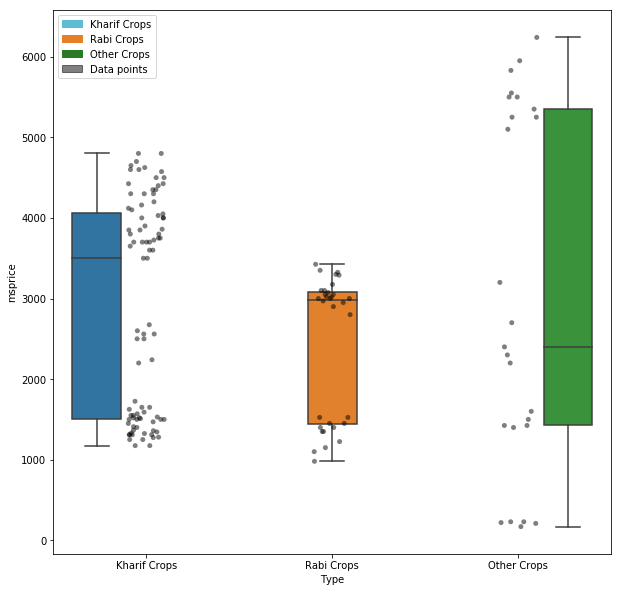

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Type", y="msprice",hue='Type',data=df) #box plot
sns.stripplot(y='msprice', x='Type',data=df,jitter=True,marker='o',alpha=0.5,color='black') #overlay data point
patch_1 = mpatches.Patch(color='#5DBCD2', label='Kharif Crops')
patch_2 = mpatches.Patch(color='#E58028', label='Rabi Crops')
patch_3 = mpatches.Patch(color='#297925', label='Other Crops')
patch_4= mpatches.Patch(color='black', label='Data points',alpha=0.5)
plt.legend(handles=[patch_1,patch_2,patch_3,patch_4])
plt.show()

### Finding outlier for  particular type of crops

In [9]:
find_type_outliers(df)

No outlier found in  Kharif Crops
No outlier found in  Rabi Crops
No outlier found in  Other Crops


### Finding outlier for individual commodities in a particular type of crop

#### Kharif Crops

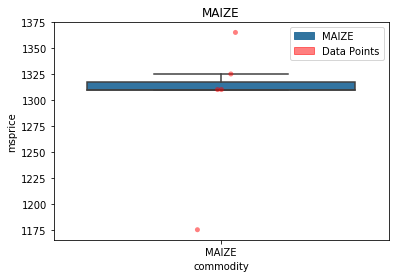

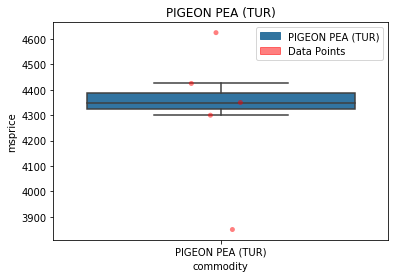

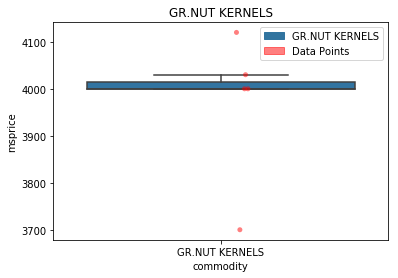

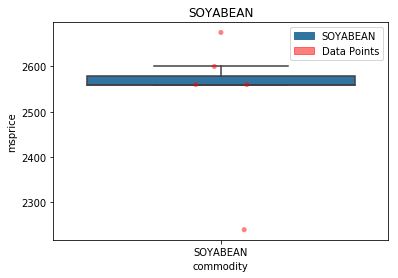

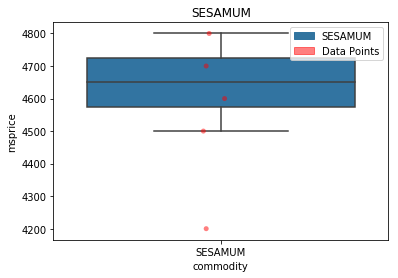

In [10]:
plot_commodity_outliers(df[df["Type"]=="Kharif Crops"])

#### Rabi Crops

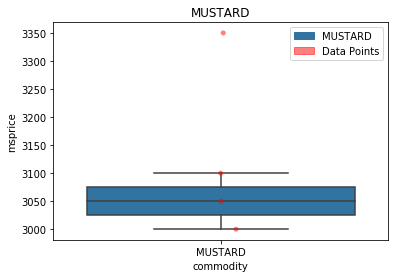

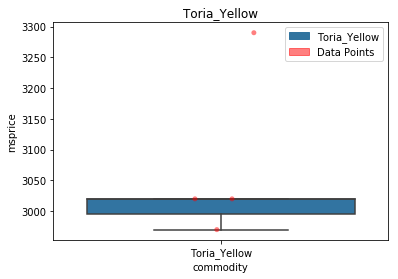

In [13]:
plot_commodity_outliers(df[df["Type"]=="Rabi Crops"])

#### Other Crops

In [14]:
plot_commodity_outliers(df[df["Type"]=="Other Crops"])

No commodity price outlier in  Other Crops


#### Remove outliers and save as csv

In [15]:
data=remove_outlier_cmo(df)
data.to_csv("CMO_MSP_Mandi_filtered.csv",index=False)